In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install pyproj
!pip install geopandas
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 48.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 48.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import requests as rq
import pandas as pd

shootings_URL = "https://data.boston.gov/api/3/action/datastore_search?resource_id=73c7e069-701f-4910-986d-b950f46c91a1&limit=10000"
shootings = pd.DataFrame((rq.get(url = shootings_URL)).json().get('result').get('records'))

In [5]:
crime_incidents_URL = "https://data.boston.gov/api/3/action/datastore_search?resource_id=b973d8cb-eeb2-4e7e-99da-c92938efc9c0&limit=5000000000"
crime_incidents = pd.DataFrame((rq.get(url = crime_incidents_URL)).json().get('result').get('records'))
common_ids = set(shootings['_id']).intersection(set(crime_incidents['_id']))
shootings = pd.merge(shootings, crime_incidents[['Long', 'Lat', '_id']], on='_id', how='inner')

selected_districts = ['D4', 'C11', 'B3', 'B2', 'E5']
shootings = shootings[shootings['district'].isin(selected_districts)]

In [6]:
shootings = shootings.dropna()
shootings.head(5)

,shooting_type_v2,victim_ethnicity_NIBRS,district,incident_num,victim_race,multi_victim,victim_gender,_id,shooting_date,Long,Lat
0,Non-Fatal,Not Hispanic or Latinx,C11,I152000196-00,Black or African American,f,Male,1,2015-01-01 13:30:00+00,-71.12883623098992,42.28630091783755
2,Non-Fatal,Not Hispanic or Latinx,E5,I152001014-00,Black or African American,f,Male,3,2015-01-04 18:52:00+00,-71.14822128377165,42.28709355259107
4,Non-Fatal,Not Hispanic or Latinx,B2,I152002233-00,Black or African American,t,Female,5,2015-01-08 22:45:00+00,-71.05970910242573,42.29755532959655
6,Fatal,Not Hispanic or Latinx,B2,I152002215-00,Black or African American,t,Male,7,2015-01-08 22:45:00+00,-71.0791845947074,42.30422175471675
7,Non-Fatal,Not Hispanic or Latinx,C11,I152003226-00,Black or African American,f,Male,8,2015-01-12 23:58:00+00,-71.05970910242573,42.29755532959655


In [7]:
import pandas as pd

parks = pd.read_csv('/content/drive/Shareddrives/CS506/SP23 Gun Violence - Councilor Worrell /Team 3/Deliverables/Proposal Deliverables/data/Parks/Parks.csv')

In [8]:
parks.shape

(531, 19)

<Axes: >

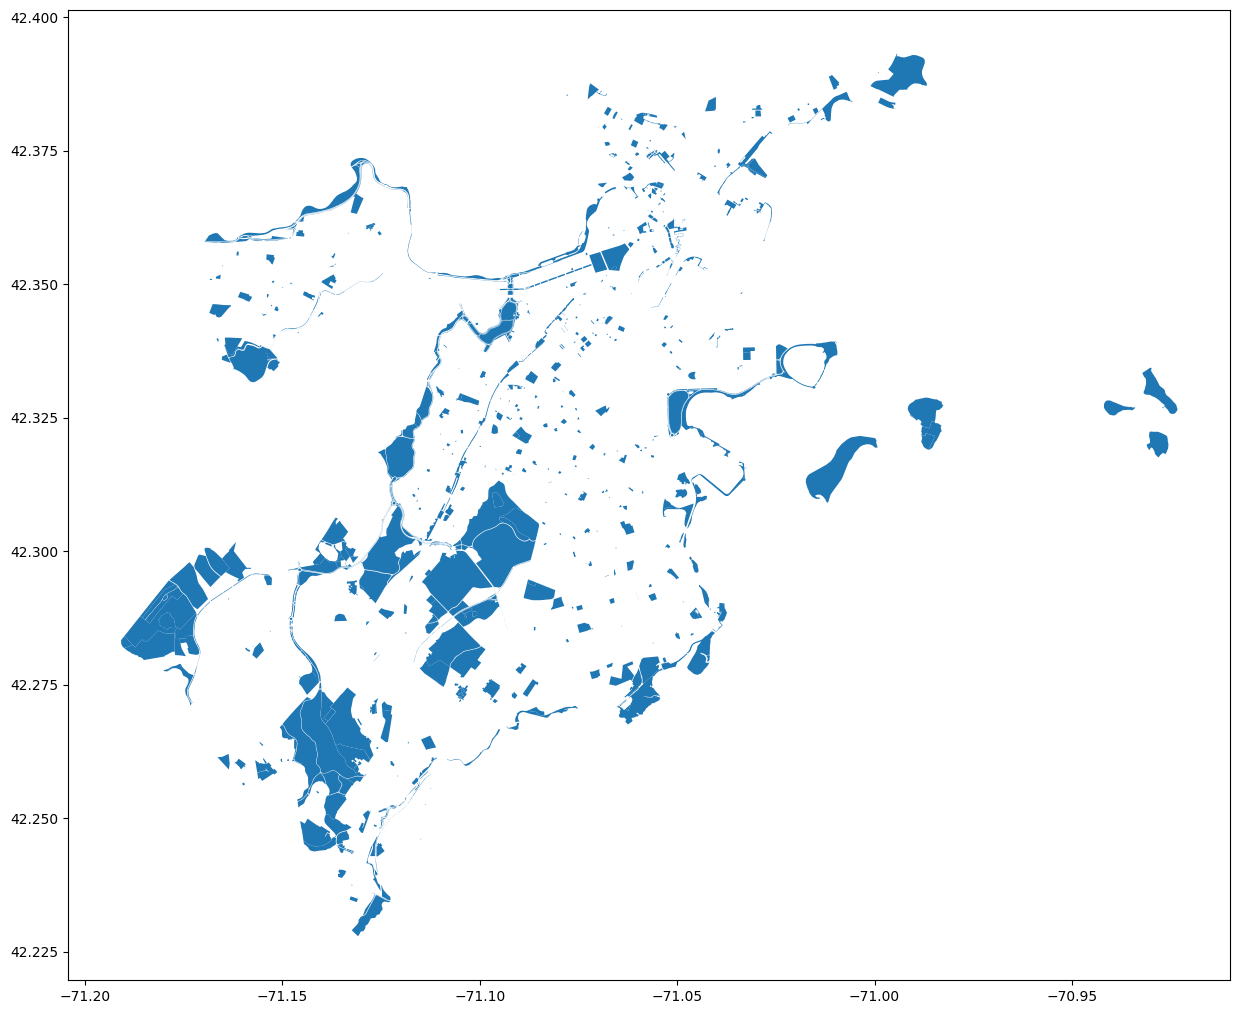

In [9]:
import geopandas as gpd
shape = gpd.read_file('/content/drive/Shareddrives/CS506/SP23 Gun Violence - Councilor Worrell /Team 3/Deliverables/Proposal Deliverables/data/Parks/shapefile')
shape = shape.to_crs(4326)
shape.plot(figsize=(15,15))

In [10]:
from shapely.geometry import Point, Polygon
geometry = [Point(xy) for xy in zip(shootings['Long'], shootings['Lat'])]
geo_df = gpd.GeoDataFrame(geometry=geometry)
geo_df.head()

,geometry
0,POINT (-71.12884 42.28630)
1,POINT (-71.14822 42.28709)
2,POINT (-71.05971 42.29756)
3,POINT (-71.07918 42.30422)
4,POINT (-71.05971 42.29756)


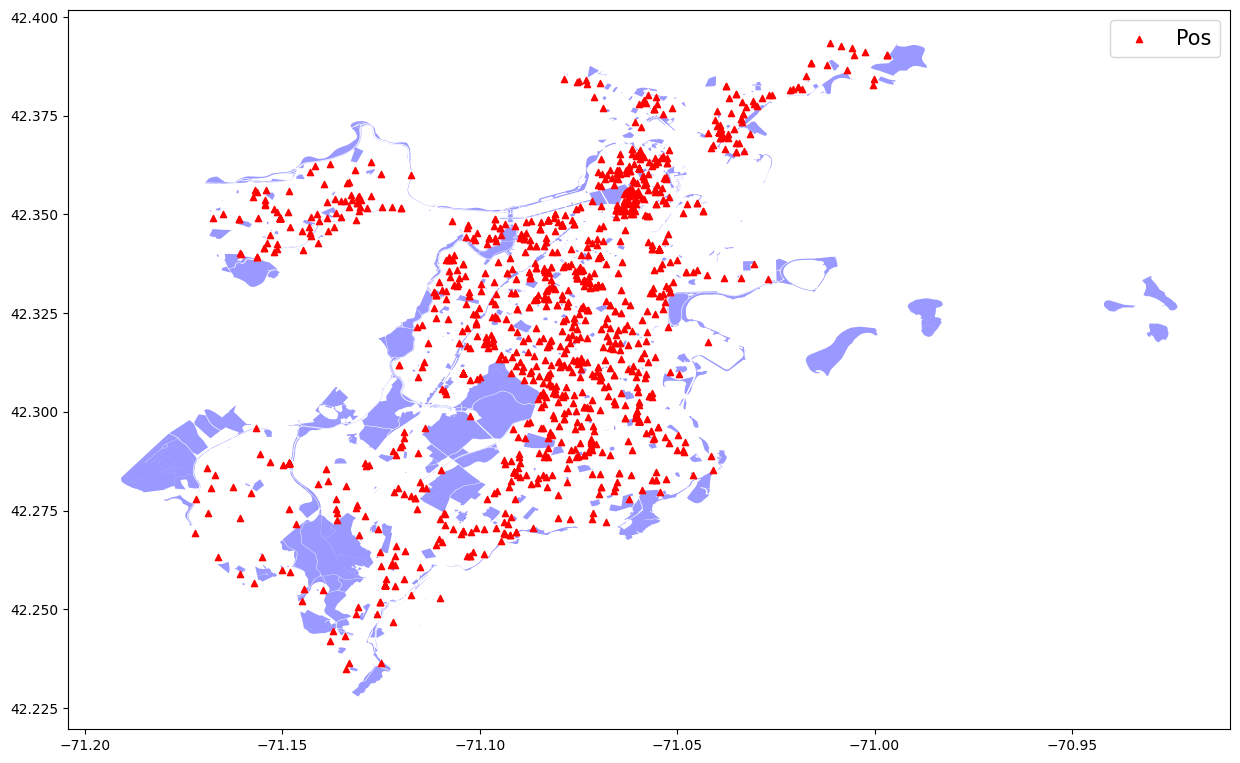

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
shape.plot(ax=ax, alpha=0.4, color='blue')

geo_df.plot(ax=ax, markersize=20, color='red', marker='^', label='Pos')
plt.legend(prop={'size':15})